In [1]:
!pip install --upgrade --no-cache-dir gdown
!pip install transformers
!pip install torch
!pip install accelerate
!pip install flask
!pip install pyngrok
!pip install opencv-python
!pip install einops
!pip install diffusers==0.21.1
!pip install omegaconf

  Attempting uninstall: gdown
    Found existing installation: gdown 4.5.1
    Uninstalling gdown-4.5.1:
      Successfully uninstalled gdown-4.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 40.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.2
    Uninstalling Werkzeug-2.2.2:
      Successfully uninstalled Werkzeug-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 43.2 MB/s e

In [3]:
#!git clone https://github.com/limuloo/MIGC.git
%cd MIGC

/notebooks/MIGC


In [4]:
!pwd

/notebooks/MIGC


In [4]:
!pip install -e .

Obtaining file:///notebooks/MIGC
  Preparing metadata (setup.py) ... done
  Running setup.py develop for MIGC


In [5]:
!gdown --id 1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T -O ./pretrained_weights/MIGC_SD14.ckpt
!gdown --id 1cmdif24erg3Pph3zIZaUoaSzqVEuEfYM -O ./migc_gui_weights/sd/cetusMix_Whalefall2.safetensors
!gdown --id 1Z_BFepTXMbe-cib7Lla5A224XXE1mBcS -O ./migc_gui_weights/clip/text_encoder/pytorch_model.bin

/usr/local/lib/python3.9/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T
From (redirected): https://drive.usercontent.google.com/download?id=1v5ik-94qlfKuCx-Cv1EfEkxNBygtsz0T&confirm=t&uuid=fbebc001-98b4-43df-b503-d59f3c9bc887
To: /notebooks/MIGC/pretrained_weights/MIGC_SD14.ckpt
100%|█████████████████████████████████████████| 230M/230M [00:02<00:00, 109MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1cmdif24erg3Pph3zIZaUoaSzqVEuEfYM
From (redirected): https://drive.usercontent.google.com/download?id=1cmdif24e

In [8]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 106.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 128.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.3
    Uninstalling transformers-4.21.3:
      Successfully uninstalled transformers-4.21.3


In [13]:
# import argparse
# import numpy as np
# import torch
# import os
# import yaml
# import random
# from diffusers.utils.import_utils import is_accelerate_available
# from transformers import CLIPTextModel, CLIPTokenizer
# from migc.migc_pipeline import StableDiffusionMIGCPipeline, MIGCProcessor, AttentionStore
# from diffusers import EulerDiscreteScheduler
# if is_accelerate_available():
#     from accelerate import init_empty_weights
# from contextlib import nullcontext

def offlinePipelineSetupWithSafeTensor(sd_safetensors_path):
    migc_ckpt_path = '/notebooks/MIGC/pretrained_weights/MIGC_SD14.ckpt' 
    clip_model_path = '/notebooks/MIGC/migc_gui_weights/clip/text_encoder'
    clip_tokenizer_path = '/notebooks/MIGC/migc_gui_weights/clip/tokenizer'
    original_config_file='/notebooks/MIGC/migc_gui_weights/v1-inference.yaml'
    ctx = init_empty_weights if is_accelerate_available() else nullcontext
    with ctx():
        # text_encoder = CLIPTextModel(config)
        text_encoder = CLIPTextModel.from_pretrained(clip_model_path)
        tokenizer = CLIPTokenizer.from_pretrained(clip_tokenizer_path)
    pipe = StableDiffusionMIGCPipeline.from_single_file(sd_safetensors_path,
                                                    original_config_file=original_config_file,
                                                    text_encoder=text_encoder,
                                                    tokenizer=tokenizer,
                                                    load_safety_checker=False)
    print('Initializing pipeline')
    pipe.attention_store = AttentionStore()
    from migc.migc_utils import load_migc
    load_migc(pipe.unet , pipe.attention_store,
            migc_ckpt_path, attn_processor=MIGCProcessor)

    pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
    return pipe

In [10]:
import yaml
from diffusers import EulerDiscreteScheduler
from migc.migc_utils import seed_everything
from migc.migc_pipeline import StableDiffusionMIGCPipeline, MIGCProcessor, AttentionStore
import os
# from google.colab.patches import cv2_imshow, cv2

# migc_ckpt_path = 'pretrained_weights/MIGC_SD14.ckpt'
# assert os.path.isfile(migc_ckpt_path), "Please download the ckpt of migc and put it in the pretrained_weighrs/ folder!"



In [14]:
pipe = offlinePipelineSetupWithSafeTensor('./migc_gui_weights/sd/cetusMix_Whalefall2.safetensors')
pipe = pipe.to("cuda")

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
You have disabled the safety checker for <class 'migc.migc_pipeline.StableDiffusionMIGCPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Initializing pipeline


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:430: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


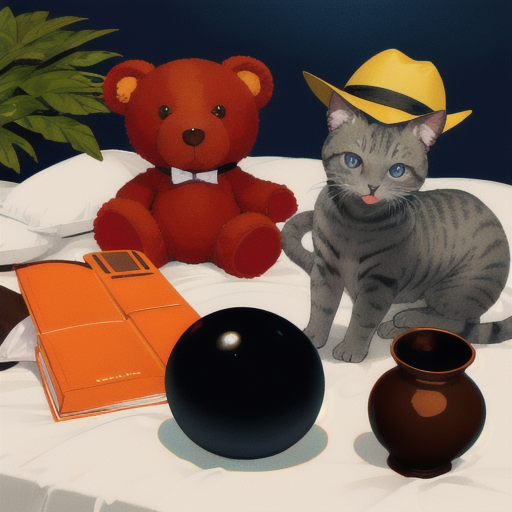

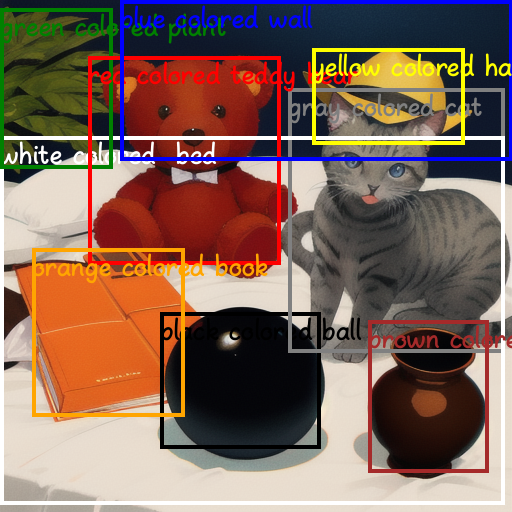

In [15]:
prompt_final = [['masterpiece, best quality,black colored ball,gray colored cat,white colored  bed,\
                  green colored plant,red colored teddy bear,blue colored wall,brown colored vase,orange colored book,\
                  yellow colored hat', 'black colored ball', 'gray colored cat', 'white colored  bed', 'green colored plant', \
                    'red colored teddy bear', 'blue colored wall', 'brown colored vase', 'orange colored book', 'yellow colored hat']]
bboxes = [[[0.3125, 0.609375, 0.625, 0.875], [0.5625, 0.171875, 0.984375, 0.6875], \
            [0.0, 0.265625, 0.984375, 0.984375], [0.0, 0.015625, 0.21875, 0.328125], \
            [0.171875, 0.109375, 0.546875, 0.515625], [0.234375, 0.0, 1.0, 0.3125], \
                [0.71875, 0.625, 0.953125, 0.921875], [0.0625, 0.484375, 0.359375, 0.8125], \
                    [0.609375, 0.09375, 0.90625, 0.28125]]]
negative_prompt = 'worst quality, low quality, bad anatomy, watermark, text, blurry'
seed = 7351007268695528845
seed_everything(seed)
image = pipe(prompt_final, bboxes, num_inference_steps=30, guidance_scale=7.5,
                MIGCsteps=15, aug_phase_with_and=False, negative_prompt=negative_prompt, NaiveFuserSteps=30).images[0]
image.save('output1.png')
image.show()
image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output1.png')
image.show()

  0%|          | 0/30 [00:00<?, ?it/s]

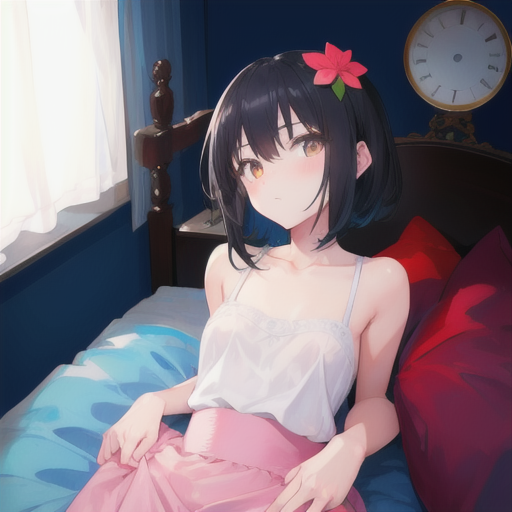

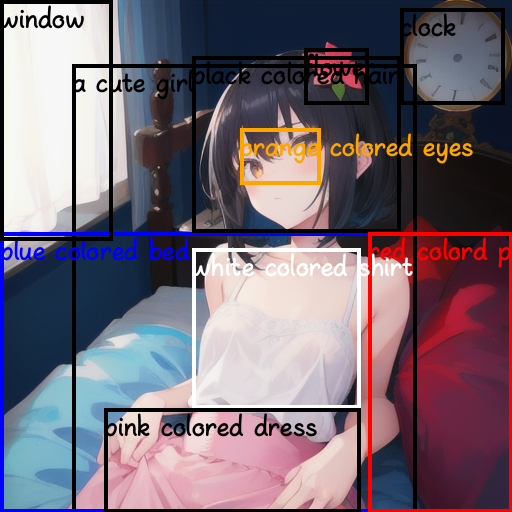

In [16]:
prompt_final = [['4k, best quality, masterpiece, ultra high res, ultra detailed,a cute girl,blue colored bed,window,\
                clock,black colored hair,orange colored eyes,red colord pillow,white colored shirt,pink colored dress,flower', \
                 'a cute girl', 'blue colored bed', 'window', 'clock', 'black colored hair', 'orange colored eyes', 'red colord pillow', \
                 'white colored shirt', 'pink colored dress', 'flower']]
bboxes = [[[0.140625, 0.125, 0.8125, 1.0], [0.0, 0.453125, 1.0, 1.0], [0.0, 0.0, 0.21875, 0.46875],
 [0.78125, 0.015625, 0.984375, 0.203125], [0.375, 0.109375, 0.78125, 0.453125], [0.46875, 0.25, 0.625, 0.359375],
  [0.71875, 0.453125, 1.0, 1.0], [0.375, 0.484375, 0.703125, 0.796875], [0.203125, 0.796875, 0.703125, 1.0], [0.59375, 0.09375, 0.71875, 0.203125]]]
negative_prompt = 'worst quality, low quality, bad anatomy, watermark, text, blurry'
seed = 4988741440008356583
seed_everything(seed)
image = pipe(prompt_final, bboxes, num_inference_steps=30, guidance_scale=8.0,
                MIGCsteps=15, aug_phase_with_and=False, negative_prompt=negative_prompt, NaiveFuserSteps=30).images[0]
image.save('output2.png')
image.show()
image = pipe.draw_box_desc(image, bboxes[0], prompt_final[0][1:])
image.save('anno_output2.png')
image.show()

